Below we imported the nessecary packages to use during this.

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

Connecting to the im.db database

In [2]:
conn = sqlite3.connect('im.db')
cur = conn.cursor()

In [3]:
table_name_query = """SELECT name 
                      AS 'Table Names' 
                      FROM sqlite_master 
                      WHERE type='table';"""

pd.read_sql(table_name_query, conn)

,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [4]:
movie_db = pd.read_sql("""
SELECT *
FROM movie_basics
    LEFT JOIN movie_ratings
        ON movie_ratings.movie_id = movie_basics.movie_id
WHERE runtime_minutes IS NOT NULL AND start_year <= 2020 AND movie_ratings.movie_id IS NOT NULL
ORDER BY numvotes DESC 

""", conn)
movie_db.reset_index()
#movie_db.genres.str.split(',').value_counts().head(20)
#movie_db.loc[movie_db['primary_title'] == 'King Kong']
# NOTE: The earliest movie we have is the year 2010
# We also must remove any movie not released yet. 


,index,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,0,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",tt1375666,8.8,1841066
1,1,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",tt1345836,8.4,1387769
2,2,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",tt0816692,8.6,1299334
3,3,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",tt1853728,8.4,1211405
4,4,tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",tt0848228,8.1,1183655
...,...,...,...,...,...,...,...,...,...,...
66231,66231,tt9879060,The Winter Garden's Tale,The Winter Garden's Tale,2018,75.0,"Documentary,Drama",tt9879060,7.6,5
66232,66232,tt9886934,The Projectionist,The Projectionist,2019,81.0,Documentary,tt9886934,7.0,5
66233,66233,tt9899880,Columbus,Columbus,2018,85.0,Comedy,tt9899880,5.8,5
66234,66234,tt9903952,BADMEN with a good behavior,BADMEN with a good behavior,2018,87.0,"Comedy,Horror",tt9903952,9.2,5


In [5]:
mb = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
mb.sort_values(by='movie')
#mb.loc[mb['movie'] == ''] #pulls out columns where 



,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5115,16,"Nov 20, 2015",#Horror,"$1,500,000",$0,$0
3954,55,"Jul 17, 2009",(500) Days of Summer,"$7,500,000","$32,425,665","$34,439,060"
4253,54,"Mar 11, 2016",10 Cloverfield Lane,"$5,000,000","$72,082,999","$108,286,422"
3447,48,"Nov 11, 2015",10 Days in a Madhouse,"$12,000,000","$14,616","$14,616"
3262,63,"Mar 31, 1999",10 Things I Hate About You,"$13,000,000","$38,177,966","$60,413,950"
...,...,...,...,...,...,...
1958,59,"Sep 15, 2017",mother!,"$30,000,000","$17,800,004","$42,531,076"
697,98,"Aug 9, 2002",xXx,"$70,000,000","$141,930,000","$267,200,000"
514,15,"Jan 20, 2017",xXx: Return of Xander Cage,"$85,000,000","$44,898,413","$345,033,359"
4756,57,"Apr 15, 2008",Ã l\'intÃ©rieur,"$3,000,000",$0,"$895,932"


In [6]:
movie_gross = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [7]:
new_db = pd.merge(left=movie_db, right=movie_gross, left_on='primary_title', right_on='title')
new_db = new_db.dropna(subset=['genres', 'studio', 'domestic_gross'])
new_db.drop(columns='foreign_gross', inplace=True)

new_db
# Drop foreign_gross completely
# remove rows with null data in genres, studio, domestic_gross

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,title,studio,domestic_gross,year
0,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",tt1375666,8.8,1841066,Inception,WB,292600000.0,2010
1,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",tt1345836,8.4,1387769,The Dark Knight Rises,WB,448100000.0,2012
2,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",tt0816692,8.6,1299334,Interstellar,Par.,188000000.0,2014
3,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",tt1853728,8.4,1211405,Django Unchained,Wein.,162800000.0,2012
4,tt0993846,The Wolf of Wall Street,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama",tt0993846,8.2,1035358,The Wolf of Wall Street,Par.,116900000.0,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975,tt4170206,Red,Red,2014,107.0,Drama,tt4170206,8.4,8,Red,Sum.,90400000.0,2010
2976,tt1666555,Anchor Baby,Anchor Baby,2010,95.0,"Drama,Thriller",tt1666555,7.0,25,Anchor Baby,AGF,15800.0,2011
2977,tt1692325,Eyes Wide Open,Eyes Wide Open,2010,110.0,"Documentary,History",tt1692325,8.7,17,Eyes Wide Open,NAV,26300.0,2010
2978,tt3436064,The Last Station,La última estación,2012,90.0,Documentary,tt3436064,7.6,10,The Last Station,SPC,6600000.0,2010


In [8]:
new_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2952 entries, 0 to 2979
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         2952 non-null   object 
 1   primary_title    2952 non-null   object 
 2   original_title   2952 non-null   object 
 3   start_year       2952 non-null   int64  
 4   runtime_minutes  2952 non-null   float64
 5   genres           2952 non-null   object 
 6   movie_id         2952 non-null   object 
 7   averagerating    2952 non-null   float64
 8   numvotes         2952 non-null   int64  
 9   title            2952 non-null   object 
 10  studio           2952 non-null   object 
 11  domestic_gross   2952 non-null   float64
 12  year             2952 non-null   int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 322.9+ KB


In [9]:
df = pd.merge(left=new_db, right=mb, left_on='primary_title', right_on='movie')
df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,title,studio,domestic_gross_x,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",tt1375666,8.8,1841066,Inception,WB,292600000.0,2010,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642"
1,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",tt1345836,8.4,1387769,The Dark Knight Rises,WB,448100000.0,2012,11,"Jul 20, 2012",The Dark Knight Rises,"$275,000,000","$448,139,099","$1,084,439,099"
2,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",tt0816692,8.6,1299334,Interstellar,Par.,188000000.0,2014,32,"Nov 5, 2014",Interstellar,"$165,000,000","$188,017,894","$666,379,375"
3,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",tt1853728,8.4,1211405,Django Unchained,Wein.,162800000.0,2012,69,"Dec 25, 2012",Django Unchained,"$100,000,000","$162,805,434","$449,948,323"
4,tt0993846,The Wolf of Wall Street,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama",tt0993846,8.2,1035358,The Wolf of Wall Street,Par.,116900000.0,2013,76,"Dec 25, 2013",The Wolf of Wall Street,"$100,000,000","$116,900,694","$389,870,414"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373,tt4360484,The Joneses,The Joneses,2016,80.0,"Biography,Documentary",tt4360484,5.9,15,The Joneses,RAtt.,1500000.0,2010,88,"Apr 16, 2010",The Joneses,"$10,000,000","$1,475,746","$3,541,565"
1374,tt1833881,Chloe,The 10 Commandments of Chloe,2013,73.0,"Drama,Music,Romance",tt1833881,6.9,34,Chloe,SPC,3100000.0,2010,97,"Mar 26, 2010",Chloe,"$13,000,000","$3,075,255","$11,831,131"
1375,tt8851190,Red,Red,2018,90.0,Drama,tt8851190,8.1,26,Red,Sum.,90400000.0,2010,63,"Oct 15, 2010",Red,"$60,000,000","$90,380,162","$196,439,693"
1376,tt4170206,Red,Red,2014,107.0,Drama,tt4170206,8.4,8,Red,Sum.,90400000.0,2010,63,"Oct 15, 2010",Red,"$60,000,000","$90,380,162","$196,439,693"


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1378 entries, 0 to 1377
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           1378 non-null   object 
 1   primary_title      1378 non-null   object 
 2   original_title     1378 non-null   object 
 3   start_year         1378 non-null   int64  
 4   runtime_minutes    1378 non-null   float64
 5   genres             1378 non-null   object 
 6   movie_id           1378 non-null   object 
 7   averagerating      1378 non-null   float64
 8   numvotes           1378 non-null   int64  
 9   title              1378 non-null   object 
 10  studio             1378 non-null   object 
 11  domestic_gross_x   1378 non-null   float64
 12  year               1378 non-null   int64  
 13  id                 1378 non-null   int64  
 14  release_date       1378 non-null   object 
 15  movie              1378 non-null   object 
 16  production_budget  1378 

In [11]:
df['production_budget'] = pd.to_numeric(df['production_budget'].replace('[^0-9\.-]', '', regex=True))
df['domestic_gross_y'] = pd.to_numeric(df['domestic_gross_y'].replace('[^0-9\.-]', '', regex=True))
df['worldwide_gross'] = pd.to_numeric(df['worldwide_gross'].replace('[^0-9\.-]', '', regex=True))

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1378 entries, 0 to 1377
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           1378 non-null   object 
 1   primary_title      1378 non-null   object 
 2   original_title     1378 non-null   object 
 3   start_year         1378 non-null   int64  
 4   runtime_minutes    1378 non-null   float64
 5   genres             1378 non-null   object 
 6   movie_id           1378 non-null   object 
 7   averagerating      1378 non-null   float64
 8   numvotes           1378 non-null   int64  
 9   title              1378 non-null   object 
 10  studio             1378 non-null   object 
 11  domestic_gross_x   1378 non-null   float64
 12  year               1378 non-null   int64  
 13  id                 1378 non-null   int64  
 14  release_date       1378 non-null   object 
 15  movie              1378 non-null   object 
 16  production_budget  1378 

In [13]:
df.describe()

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross_x,year,id,production_budget,domestic_gross_y,worldwide_gross
count,1378.000000,1378.000000,1378.000000,1.378000e+03,1.378000e+03,1378.000000,1378.000000,1.378000e+03,1.378000e+03,1.378000e+03
mean,2013.653120,107.301887,6.439478,1.162326e+05,6.067686e+07,2013.723512,51.831640,4.640999e+07,6.055063e+07,1.513981e+08
std,2.521108,19.720679,1.014403,1.651563e+05,8.515963e+07,2.526786,28.560692,5.543063e+07,8.518984e+07,2.350158e+08
min,2010.000000,3.000000,1.600000,5.000000e+00,8.000000e+02,2010.000000,1.000000,5.000000e+04,0.000000e+00,0.000000e+00
25%,2011.000000,95.000000,5.900000,1.517450e+04,7.250000e+06,2011.000000,27.000000,1.000000e+07,7.195253e+06,1.753941e+07
50%,2014.000000,105.000000,6.500000,6.033650e+04,3.370000e+07,2014.000000,52.000000,2.500000e+07,3.333898e+07,6.531321e+07
75%,2016.000000,118.000000,7.100000,1.397005e+05,7.390000e+07,2016.000000,76.000000,5.800000e+07,7.409887e+07,1.707416e+08
max,2019.000000,192.000000,9.200000,1.841066e+06,7.001000e+08,2018.000000,100.000000,4.106000e+08,7.000596e+08,2.048134e+09


The two commented out cells below export the two charts we are using to their own .csv files. We will use this in a separate jupyter notebook to make charts.

In [14]:
# new_db 
# compress_opts_new_db = dict(method = 'zip', archive_name = 'df_rating.csv')
# new_db.to_csv('df_rating.zip', index = False, compression = compress_opts_new_db)

In [15]:
# df 
# compress_opts_new_db = dict(method = 'zip', archive_name = 'df_gross.csv')
# df.to_csv('df_gross.zip', index = False, compression = compress_opts_new_db)

The following charts and tables below are us playing around with the data to try and understand it a bit more.

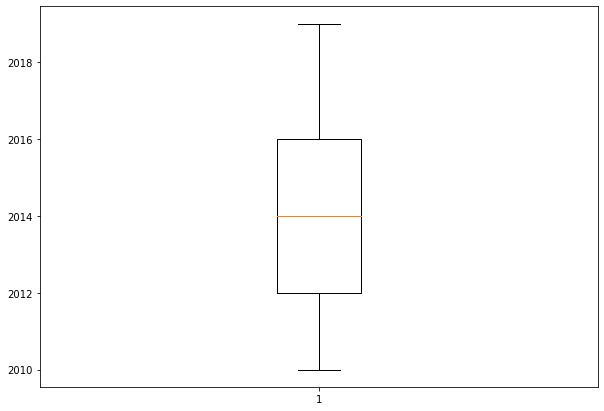

In [16]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(new_db.start_year)
plt.show()

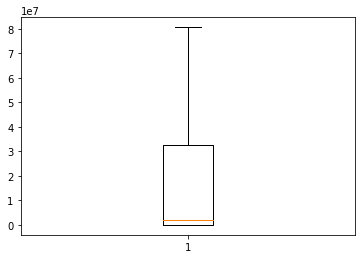

In [17]:
plt.boxplot(new_db.domestic_gross, showfliers=False)
plt.show()

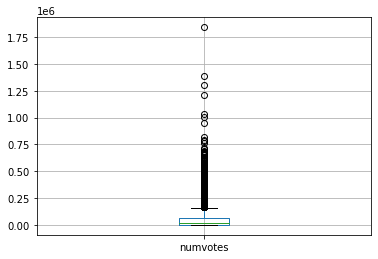

In [18]:
new_db.boxplot(['numvotes'])
plt.show()

0.12204497085309106


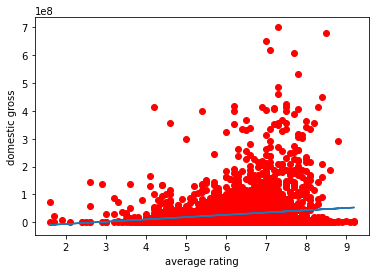

In [19]:
plt.scatter(new_db['averagerating'], new_db['domestic_gross'], c= 'r')
plt.xlabel("average rating")
plt.ylabel("domestic gross")
a, b = np.polyfit(new_db['averagerating'], new_db['domestic_gross'], 1)
plt.plot(new_db['averagerating'], a*new_db['averagerating']+b) 
corr = new_db['averagerating'].corr(new_db['domestic_gross'])
print(corr)
plt.show()

0.6677536530387465


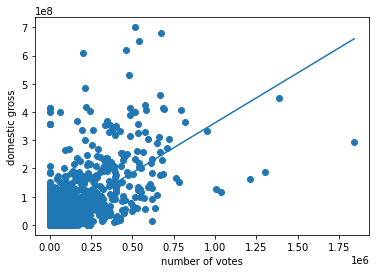

In [20]:
plt.scatter(new_db['numvotes'], new_db['domestic_gross'])
plt.xlabel("number of votes")
plt.ylabel("domestic gross")
a, b = np.polyfit(new_db['numvotes'], new_db['domestic_gross'], 1)
plt.plot(new_db['numvotes'], a*new_db['numvotes']+b) 
corr = new_db['numvotes'].corr(new_db['domestic_gross'])
print(corr)
plt.show()

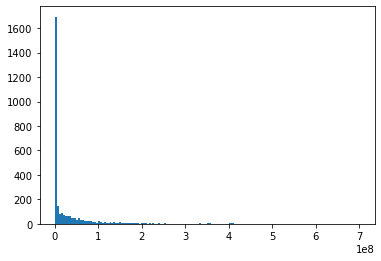

In [21]:
plt.hist(new_db.domestic_gross, bins = 'auto')
plt.show()

In [22]:
new_db[new_db.domestic_gross > 0 ]

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,title,studio,domestic_gross,year
0,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",tt1375666,8.8,1841066,Inception,WB,292600000.0,2010
1,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",tt1345836,8.4,1387769,The Dark Knight Rises,WB,448100000.0,2012
2,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",tt0816692,8.6,1299334,Interstellar,Par.,188000000.0,2014
3,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",tt1853728,8.4,1211405,Django Unchained,Wein.,162800000.0,2012
4,tt0993846,The Wolf of Wall Street,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama",tt0993846,8.2,1035358,The Wolf of Wall Street,Par.,116900000.0,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975,tt4170206,Red,Red,2014,107.0,Drama,tt4170206,8.4,8,Red,Sum.,90400000.0,2010
2976,tt1666555,Anchor Baby,Anchor Baby,2010,95.0,"Drama,Thriller",tt1666555,7.0,25,Anchor Baby,AGF,15800.0,2011
2977,tt1692325,Eyes Wide Open,Eyes Wide Open,2010,110.0,"Documentary,History",tt1692325,8.7,17,Eyes Wide Open,NAV,26300.0,2010
2978,tt3436064,The Last Station,La última estación,2012,90.0,Documentary,tt3436064,7.6,10,The Last Station,SPC,6600000.0,2010


In [23]:
tmdb = pd.read_csv("zippedData/tmdb.movies.csv.gz")
tmdb.head()
# SELECT CASE WHEN genre_id = 28 THEN 'Action'
# WHEN genre_id = 12 THEN 'Adventure'
# WHEN genre_id = 16 THEN 'Animation'
# WHEN genre_id = 35 THEN 'Comedy'
# WHEN genre_id = 80 THEN 'Crime'
# WHEN genre_id = 99 THEN 'Documentary'
# WHEN genre_id = 18 THEN 'Drama'
# WHEN genre_id = 10751 THEN 'Family'
# WHEN genre_id = 14 THEN 'Fantasy'
# WHEN genre_id = 36 THEN 'History'
# WHEN genre_id = 27 THEN 'Horror'
# WHEN genre_id =  10402 THEN 'Music'
# WHEN genre_id = 9648 THEN 'Mystery'
# WHEN genre_id = 10749 THEN 'Romance'
# WHEN genre_id = 878 THEN 'Science Fiction'
# WHEN genre_id = 10770 THEN 'TV Movie'
# WHEN genre_id = 53 THEN 'Thriller'
# WHEN genre_id = 10752 THEN 'War'
# WHEN genre_id = 37 THEN 'Western'


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
